<a href="https://colab.research.google.com/github/vivielvirasaputri/Laporan-Praktikum-Machine-Learning/blob/main/Vivi_Elvira_Saputri_Syah_(F1F022001)_Laprak1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum I Machine Learning**

'''
=================================================
Nama  : Vivi Elvira Saputri Syah

NPM : F1F022001


'''
=================================================

# Latar Belakang

*Feature engineering* merupakan proses penting dalam machine learning yang bertujuan mengubah data mentah menjadi fitur yang lebih bermakna sehingga model mampu mengenali pola secara lebih efektif. Proses ini meliputi pembersihan data, transformasi variabel, pengkodean data kategorik, hingga pembentukan fitur baru berdasarkan pemahaman domain. Dalam konteks pemodelan prediktif, kualitas fitur sering kali lebih menentukan kinerja model dibandingkan kompleksitas algoritma yang digunakan. Menurut Kusrini & Luthfi (2009) yang menjelaskan bahwa pemilihan dan pembentukan fitur yang tepat memiliki pengaruh langsung terhadap kemampuan model dalam mengolah informasi dan meningkatkan akurasi prediksi (Herdian, dkk., 2024).

Dalam praktiknya, *feature engineering* membantu mengatasi permasalahan seperti distribusi data yang tidak normal, variabel yang berskala berbeda, keberadaan *missing values*, dan hubungan *non-linear*. Teknik seperti *standardization*, *normalization*, *encoding*, serta ekstraksi fitur berbasis waktu atau kategori telah sering digunakan dalam penelitian untuk meningkatkan akurasi model dalam berbagai kasus, mulai dari prediksi ekonomi hingga klasifikasi data kesehatan. Penelitian lokal menunjukkan bahwa pemilihan fitur relevan dapat meningkatkan performa model secara signifikan (Faiz, dkk., 2022).

Seiring berkembangnya data digital, khususnya pada sektor kesehatan, keuangan, dan transportasi, kebutuhan akan *feature engineering* menjadi semakin besar. Meskipun teknik modern seperti deep learning mampu melakukan ekstraksi fitur otomatis, pemahaman terhadap karakteristik data dan konteks permasalahan tetap menjadi faktor utama dalam meningkatkan kualitas analisis. Beberapa penelitian Indonesia juga menekankan bahwa kombinasi antara teknik rekayasa fitur dan pemilihan fitur yang tepat mampu menghasilkan model prediksi yang lebih stabil dan akurat (Rahayu, dkk., 2024).

# Rumusan Masalah

Berdasarkan latar belakang, rumusan masalah yang dapat disimpulkan sebagai berikut:

1.   Apa konsep dari berbagai jenis *feature engineering* pada Python?
2.   Bagaimana cara melakukan teknik *feature engineering* di program Python?

# Tujuan Penelitian


Berdasarkan rumusan masalah di atas, tujuan yang dapat disimpulkan sebgai berikut:

1.   Dapat memahami konsep dari berbagai jenis *feature engineering* pada Python.
2.   Dapat melakukan teknik *feature engineering* di program Python.

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [1]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 4.8 MB/s eta 0:00:00


In [2]:
# Define Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#Encoding
from sklearn.preprocessing import OneHotEncoder

#Handling Outlier
from feature_engine.outliers import Winsorizer

#Balancing Data
from imblearn.over_sampling import SMOTE

#model ML
from sklearn.linear_model import LogisticRegression

#model performence
from sklearn.metrics import classification_report, f1_score

# Memuat Data

Sebelum kita membahas lebih jauh tentang Feature Engineering, berikut ini adalah beberapa dataset yang akan digunakan untuk memperjelas tujuan dari notebook ini.

In [3]:
# Load penelitian Dataset

df_ori = pd.read_csv('https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/data_penelitian.csv', sep=';')
data_pt1 = df_ori.copy()
data_pt1.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,NaN
1,1,24.0,90,1.0,NaN
2,1,26.8,77,1.0,NaN
3,1,29.6,62,2.0,2.0
4,1,30.8,56,1.0,7.0
5,1,31.0,55,1.0,7.0
6,1,30.4,57,3.0,9.0
7,2,30.9,58,2.0,10.0
8,2,30.2,62,2.0,8.0
9,2,29.7,62,2.0,7.0


In [4]:
# Melihat dimensi data
data_pt1.shape

(743, 5)

In [5]:
#melihat tipe data
data_pt1.dtypes

,0
Hujan,int64
Suhu Udara,float64
Kelembapan,int64
Keadaan Cuaca,float64
Kecepatan Angin,float64


# Analisis Data Eksploratif

# _Feature Engineering_

## A - *Missing Value*

Data hilang (***missing data***) atau nilai hilang (***missing values***) terjadi ketika tidak ada data atau nilai yang tersimpan untuk suatu observasi pada variabel tertentu.

Kehilangan data adalah hal yang sering terjadi, baik dalam kompetisi data science maupun di dunia bisnis, dan dapat mempengaruhi kesimpulan yang diambil dari data tersebut. **Data yang tidak lengkap merupakan masalah yang tidak bisa dihindari saat bekerja dengan berbagai sumber data.**

---
### - Kenapa data hilang (data missing)?

Ada berbagai alasan mengapa data bisa hilang, antara lain:
* Nilai bisa **hilang** atau **tidak tersimpan dengan benar** saat proses pengumpulan data.
  
  Misalnya, data berasal dari survei yang diisi secara manual ke dalam formulir online. Petugas entri data bisa saja lupa mengisi satu kolom dalam formulir tersebut, sehingga nilai pada kolom itu menjadi hilang.

* **Nilai memang tidak ada.**

  Contohnya: untuk variabel yang dihitung dari hasil pembagian antara dua variabel, seperti rasio utang terhadap pendapatan. Jika seseorang tidak memiliki pendapatan, maka nilai rasio tersebut tidak dapat dihitung karena pembagian dengan nol tidak terdefinisi.


* Data hilang juga bisa terjadi karena **responden menolak menjawab** pertanyaan tertentu dalam formulir.
  
  Misalnya, seseorang mungkin enggan mengungkapkan jumlah pendapatannya. Akibatnya, nilai untuk variabel “pendapatan” akan menjadi hilang bagi orang tersebut.

Selain memahami penyebab hilangnya data, **penting juga untuk memahami mekanisme bagaimana nilai-nilai yang hilang itu muncul dalam dataset**.
Tergantung pada mekanismenya, kita bisa memilih untuk memproses nilai yang hilang dengan cara yang berbeda. Selain itu, dengan mengetahui sumber data yang hilang, kita juga bisa mengambil langkah untuk mengendalikan sumber tersebut, dan mengurangi jumlah data yang hilang di masa depan selama proses pengumpulan data.

In [6]:
# Check Missing Values

data_pt1.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,9
Kecepatan Angin,314


In [7]:
# Check Missing Values as Percentage to Total Data

data_pt1.isnull().mean()

,0
Hujan,0.000000
Suhu Udara,0.000000
Kelembapan,0.000000
Keadaan Cuaca,0.012113
Kecepatan Angin,0.422611


In [8]:
#Missing value kolom Keadaan Cuaca
data_pt1[data_pt1['Keadaan Cuaca'].isnull()].head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
41,2,26.0,92,NaN,NaN
206,1,23.8,98,NaN,5.0
309,1,23.3,97,NaN,NaN
511,2,28.8,79,NaN,12.0
597,2,24.6,92,NaN,NaN
638,1,22.8,98,NaN,4.0
674,2,25.5,96,NaN,NaN
722,2,27.0,80,NaN,4.0
724,2,31.0,57,NaN,6.0


### Penanganan Data Missing

#### -Drop Missing Data

In [9]:
#Drop
data_pt1_dropna=data_pt1.dropna()
data_pt1_dropna.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,0
Kecepatan Angin,0


In [10]:
data_pt1_dropna.shape

(424, 5)

#### -Imputasi Missing Data

In [11]:
#Imputasi Maju
# 'ffill' = forward fill
df_imp1=data_pt1.copy()
df_imp1['Keadaan Cuaca'] = df_imp1['Keadaan Cuaca'].fillna(method='ffill')
#'bfill' = backward fill
#df_imp1['Keadaan Cuaca'] = df_imp1['Keadaan Cuaca'].fillna(method='bfill')
df_imp1.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,0
Kecepatan Angin,314


In [12]:
df_imp1.iloc[41]

,41
Hujan,2.0
Suhu Udara,26.0
Kelembapan,92.0
Keadaan Cuaca,2.0
Kecepatan Angin,NaN


In [13]:
df_imp2=data_pt1.copy()
# Hitung nilai mean
mean_value = df_imp2['Kecepatan Angin'].mean()

# Isi NaN dengan mean
df_imp2['Kecepatan Angin'] = df_imp2['Kecepatan Angin'].fillna(mean_value)
df_imp2.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,9
Kecepatan Angin,0


In [14]:
df_imp3=data_pt1.copy()
# Hitung nilai median
median_value = df_imp3['Kecepatan Angin'].median()

# Isi NaN dengan median
df_imp3['Kecepatan Angin'] = df_imp3['Kecepatan Angin'].fillna(median_value)
df_imp3.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,9
Kecepatan Angin,0


In [15]:
df_imp4=data_pt1.copy()

# Isi NaN dengan interpolasi
df_imp4['Keadaan Cuaca'] = df_imp4['Keadaan Cuaca'].interpolate(method='linear')
df_imp4.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,0
Kecepatan Angin,314


In [16]:
median_value = df_imp4['Kecepatan Angin'].median()
# Isi NaN dengan median
df_imp4['Kecepatan Angin'] = df_imp4['Kecepatan Angin'].fillna(median_value)
df_imp4.isnull().sum()

,0
Hujan,0
Suhu Udara,0
Kelembapan,0
Keadaan Cuaca,0
Kecepatan Angin,0


## B - Kardinalitas

In [17]:
df_imp4.head(10)

,Hujan,Suhu Udara,Kelembapan,Keadaan Cuaca,Kecepatan Angin
0,1,23.0,95,5.0,6.0
1,1,24.0,90,1.0,6.0
2,1,26.8,77,1.0,6.0
3,1,29.6,62,2.0,2.0
4,1,30.8,56,1.0,7.0
5,1,31.0,55,1.0,7.0
6,1,30.4,57,3.0,9.0
7,2,30.9,58,2.0,10.0
8,2,30.2,62,2.0,8.0
9,2,29.7,62,2.0,7.0


In [18]:
df_imp4['Keadaan Cuaca'].unique()

array([ 5. ,  1. ,  2. ,  3. , 14. , 60. , 61. , 21. , 29. , 10. , 16. ,
       62. , 63. , 65. , 15. , 17. , 13. , 95. , 91. , 49. , 97. , 56. ,
        1.5])

In [19]:
#Mengurangi Kardinalitas

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
### 2. Tentukan Label untuk Setiap Bin
# 10 label (0 s/d 9)
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### 3. Terapkan pd.cut
df_imp4['Keadaan_Cuaca_reduced'] = pd.cut(
    df_imp4['Keadaan Cuaca'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

### 4. Verifikasi
print("--- Hasil Perbandingan ---")
# Menampilkan 10 data acak untuk melihat perubahannya
print(df_imp4.sample(10))

print("\n--- Pengecekan Kardinalitas ---")
print('Jumlah kategori di "Keadaan Cuaca" asli : {}'.format(len(df_imp4['Keadaan Cuaca'].unique())))
print('Jumlah kategori di "Keadaan_Cuaca_reduced" : {}'.format(len(df_imp4['Keadaan_Cuaca_reduced'].unique())))

print("\nKategori unik yang baru (reduced):")
print(df_imp4['Keadaan_Cuaca_reduced'].unique())

--- Hasil Perbandingan ---
     Hujan  Suhu Udara  Kelembapan  Keadaan Cuaca  Kecepatan Angin  \
333      2        23.4          96            2.0              6.0   
590      2        26.1          92           21.0              2.0   
411      2        30.2          62            1.0              6.0   
425      2        24.5          93           61.0              6.0   
542      2        23.7          97           91.0              5.0   
364      1        30.9          62            2.0              7.0   
680      2        30.0          64            2.0              5.0   
324      2        26.8          87           21.0              5.0   
592      2        25.6          92            2.0              6.0   
210      2        23.4          98           61.0              6.0   

    Keadaan_Cuaca_reduced  
333                     0  
590                     2  
411                     0  
425                     6  
542                     9  
364                     0  
680   

## C- Splitting Data

In [20]:
#mendeskripsikan variabel X dan y
df_imp4=df_imp4.drop('Keadaan Cuaca', axis = 1)
X= df_imp4.drop('Hujan', axis = 1)
y=df_imp4['Hujan']

In [21]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=200, shuffle= False)

In [22]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=200, shuffle= True)
X_train.shape

(594, 4)

In [23]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=200, stratify=y)
X_test.shape

(149, 4)

## D- Handling Outlier

In [24]:
#buat list fitur numerik
list_num = ['Suhu Udara', 'Kelembapan', 'Kecepatan Angin']
# Hitung IQR
list_outlier=[]
list_lower_bound =[]
list_upper_bound =[]
for i in X_train[list_num]:
    Q1 = np.percentile(X_train[i], 25)
    Q3 = np.percentile(X_train[i], 75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    list_lower_bound.append(lower_bound)
    list_upper_bound.append(upper_bound)

    # Hitung jumlah outlier di bawah batas bawah dan di atas batas atas
    num_outliers_lower = np.sum(X_train[i] < lower_bound)
    num_outliers_upper = np.sum(X_train[i] > upper_bound)

    # Jumlah total outlier
    total_outliers = num_outliers_lower + num_outliers_upper
    list_outlier.append(total_outliers)

#Mendefinikan dataframe baru mengenai outliers
outliers = pd.DataFrame()
outliers['Kolom'] = list_num
outliers['Jumlah Outlier'] = list_outlier
outliers['Lower Bound'] = list_lower_bound
outliers['Upper Bound'] = list_upper_bound
outliers

,Kolom,Jumlah Outlier,Lower Bound,Upper Bound
0,Suhu Udara,0,17.0625,36.1625
1,Kelembapan,0,46.5000,122.5000
2,Kecepatan Angin,196,4.5000,8.5000


Dari hasil analisa diketahui bahwa 1 kolom fitur memiliki outlier pada data dengan jumlah yang besar.

In [25]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
df_num = X_train[list_num]
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan', 'Kecepatan Angin']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara']


Setelah dilihat sebaran datanya, diketahui bahwa kolom fitur kecepatan angin berdistribusi skew

#### Trimming

In [26]:
outliers_indexed = outliers.set_index('Kolom')
# Ambil nilai lower dan upper berdasarkan indeks 'Kecepatan Angin'
lower_kecepatan = outliers_indexed.loc['Kecepatan Angin', 'Lower Bound']
upper_kecepatan = outliers_indexed.loc['Kecepatan Angin', 'Upper Bound']

# Flag the outliers in category
outliers_KecepAngin = np.where(X_train['Kecepatan Angin'] > upper_kecepatan, True,
                       np.where(X_train['Kecepatan Angin'] < lower_kecepatan, True, False))


# Trimming the dataset
X_train_trimmed1 = X_train.loc[~(outliers_KecepAngin)]

print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed1.shape)

Size dataset - Before trimming :  (594, 4)
Size dataset - After trimming  :  (398, 4)


#### Capping

In [45]:
# Capping the skew distribution

winsoriser_Kecepatan_Angin = Winsorizer(capping_method='iqr', #gaussian for normal distribution
                            tail='both',
                            fold=1.5,
                            variables=['Kecepatan Angin'],
                            missing_values='ignore')

X_train_capped = winsoriser_Kecepatan_Angin.fit_transform(X_train)
X_test_capped = winsoriser_Kecepatan_Angin.transform(X_test)

#### visualisasi

In [46]:
#Defining a function to create histogram and box plot for certain variables
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, color='teal')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='teal')
    plt.title('Boxplot')

    plt.show()

Suhu Udara - Before Capping


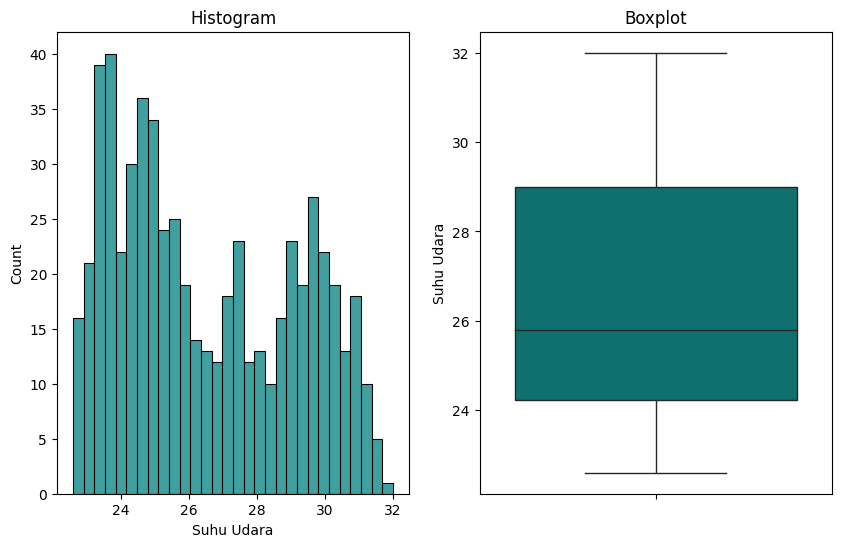


Suhu Udara - After Capping


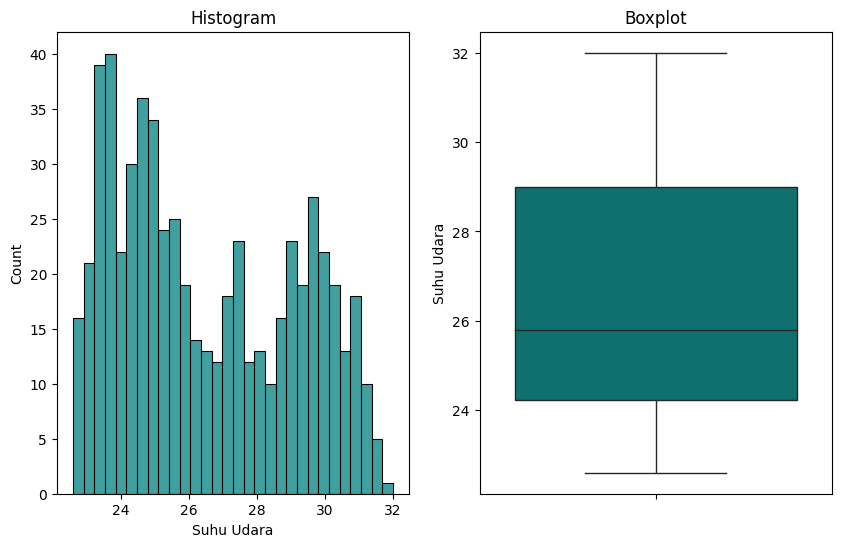

Kelembapan - Before Capping


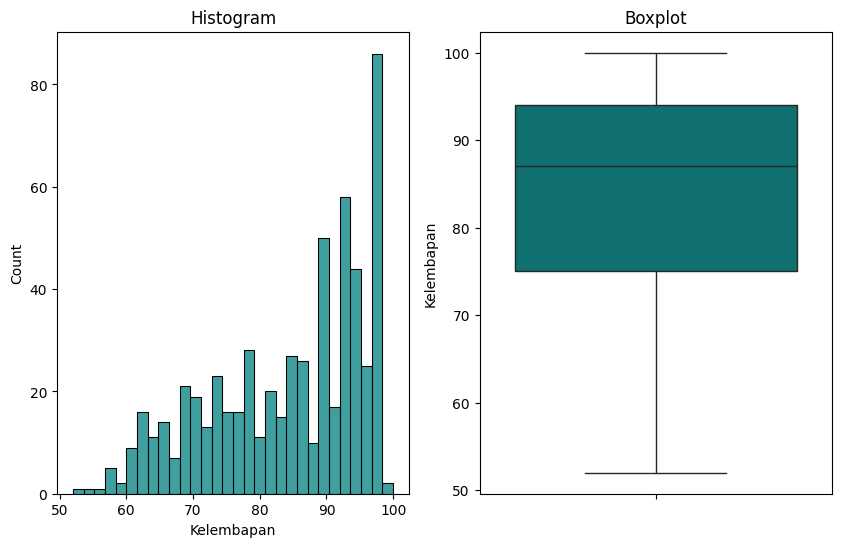


Kelembapan - After Capping


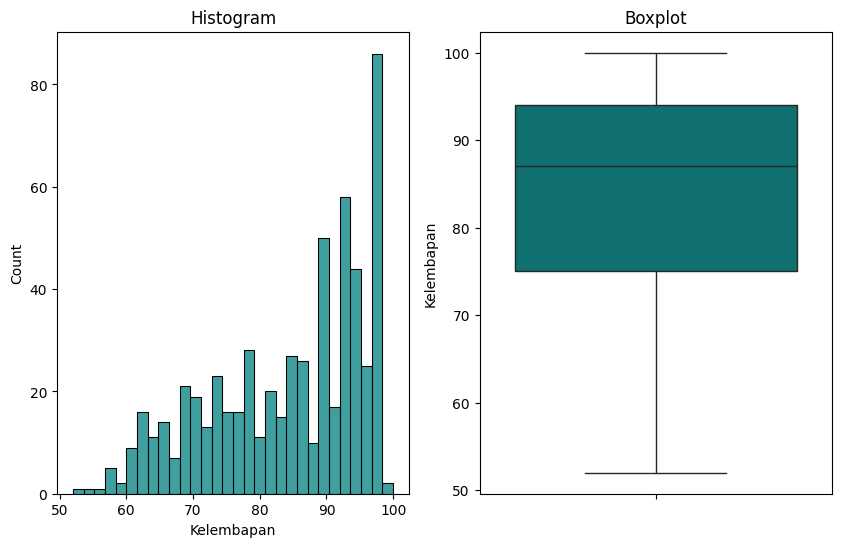

Kecepatan Angin - Before Capping


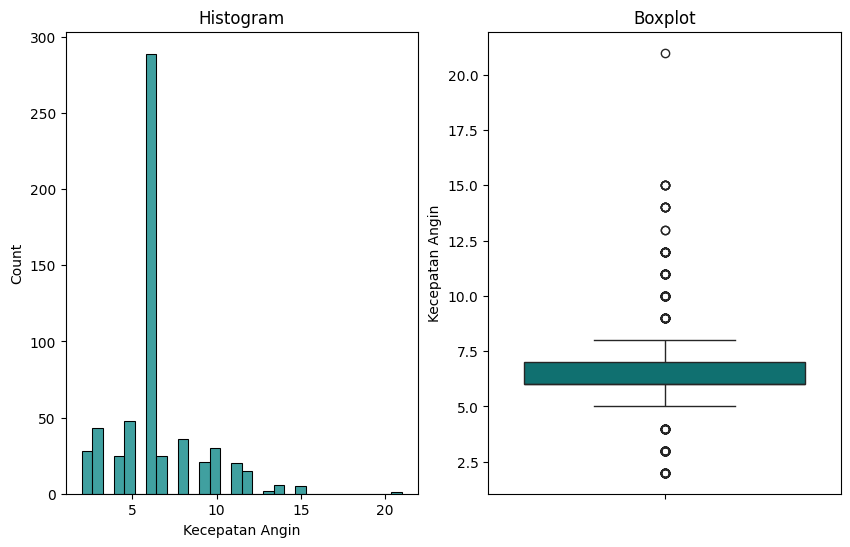


Kecepatan Angin - After Capping


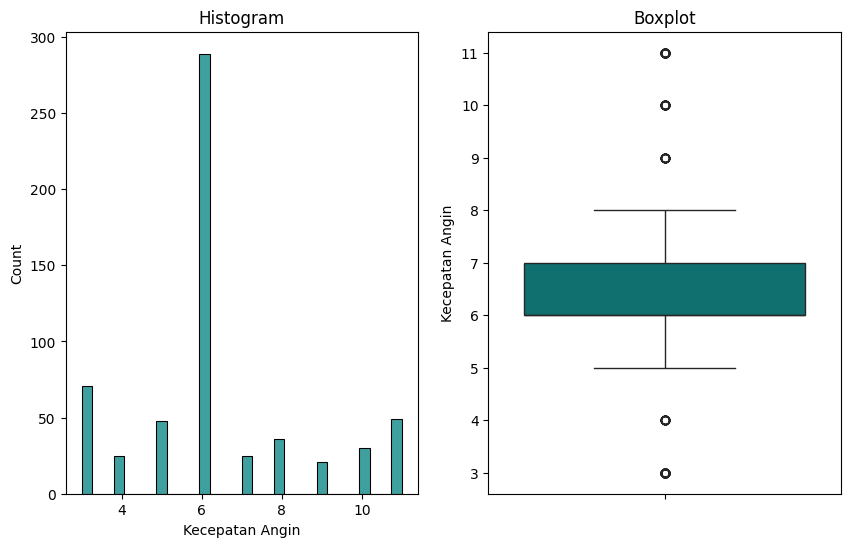

In [30]:
# Plotting histogram and boxplot before and after capping
for col in list_num:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)


## E- Scaling

In [31]:
#mendefinisikan kolom yang digunakan dan list tempat value skewness
nilai_skew = []
nilai_skew_normal = []

#membuat fungsi untuk memetakan distribusi setiap kolom
for i in df_num.columns:
    skewness = X_train_capped[i].skew()
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(i)
    else:
        nilai_skew.append(i)

# Menampilkan list
print('kolom yang mempunyai nilai skewness sedang:', nilai_skew)
print('kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

kolom yang mempunyai nilai skewness sedang: ['Kelembapan', 'Kecepatan Angin']
kolom yang mempunyai nilai skewness normal: ['Suhu Udara']


In [32]:
#melakukan scalling menggunakan standard scaller
standard_scaler = StandardScaler()
standard_scaler.fit(X_train_capped[nilai_skew_normal])
X_train_capped[nilai_skew_normal] = standard_scaler.transform(X_train_capped[nilai_skew_normal])
X_test_capped[nilai_skew_normal] = standard_scaler.transform(X_test_capped[nilai_skew_normal])

In [33]:
#melakukan scalling menggunakan robust scaller
robust_scaler = RobustScaler()
robust_scaler.fit(X_train_capped[nilai_skew])
X_train_capped[nilai_skew] = robust_scaler.transform(X_train_capped[nilai_skew])
X_test_capped[nilai_skew] = robust_scaler.transform(X_test_capped[nilai_skew])

In [34]:
X_train_scale = X_train_capped
X_test_scale = X_test_capped

## F- Encoding

### One Hot Encoder

In [35]:
list_cat = ['Keadaan_Cuaca_reduced']

encoder = OneHotEncoder()

#melakukan encoding
X_train_encoded = encoder.fit_transform(X_train_scale[list_cat])
X_test_encoded = encoder.transform(X_test_scale[list_cat])

### Ordinal Encoder

In [36]:
# lis_ord = ['smoker']
# smoker_cat = ['no', 'yes'] #mengatur urutan
# ord_enc = OrdinalEncoder(categories= [smoker_cat]) #mendefinisikan fungsi encoding

# #melakukan encoding
# X_train_select[lis_ord] = ord_enc.fit_transform(X_train_select[['smoker']])
# X_test_select[lis_ord] = ord_enc.transform(X_test[['smoker']])

## G- Balancing Data

In [37]:
y_train.value_counts()

,count
Hujan,
2,463
1,131


In [56]:
# Oversampling with SMOTE

smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)     # Minority Class will have same the same number as the majority class
# smote = SMOTE(sampling_strategy={1:1000}, k_neighbors=5, random_state=42)     # Minority Class will have 1000 data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_encoded, y_train)
y_train_balanced.value_counts()

,count
Hujan,
1,463
2,463


# _Training Model_

In [49]:
#tanpa feature engineering
lr_1 = LogisticRegression()
lr_1.fit(X_train, y_train)

LogisticRegression()

In [50]:
#dengan feature engineering
lr_2 = LogisticRegression()
lr_2.fit(X_train_encoded, y_train)

LogisticRegression()

In [51]:
#dengan feature engineering dan balancing data
lr_3 = LogisticRegression()
lr_3.fit(X_train_balanced, y_train_balanced)

LogisticRegression()

# _Model Performance_

In [52]:
# Check Results - without Handling

print(classification_report(y_train, lr_1.predict(X_train)))
print(classification_report(y_test, lr_1.predict(X_test)))

              precision    recall  f1-score   support

           1       0.56      0.18      0.27       131
           2       0.80      0.96      0.88       463

    accuracy                           0.79       594
   macro avg       0.68      0.57      0.57       594
weighted avg       0.75      0.79      0.74       594

              precision    recall  f1-score   support

           1       0.60      0.18      0.28        33
           2       0.81      0.97      0.88       116

    accuracy                           0.79       149
   macro avg       0.70      0.57      0.58       149
weighted avg       0.76      0.79      0.75       149



In [53]:
# Check Results - with Handling

print(classification_report(y_train, lr_2.predict(X_train_encoded)))
print(classification_report(y_test, lr_2.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.60      0.27      0.37       131
           2       0.82      0.95      0.88       463

    accuracy                           0.80       594
   macro avg       0.71      0.61      0.63       594
weighted avg       0.77      0.80      0.77       594

              precision    recall  f1-score   support

           1       0.54      0.21      0.30        33
           2       0.81      0.95      0.87       116

    accuracy                           0.79       149
   macro avg       0.67      0.58      0.59       149
weighted avg       0.75      0.79      0.75       149



In [54]:
# Check Results - with Handling

print(classification_report(y_train_balanced, lr_3.predict(X_train_balanced)))
print(classification_report(y_test, lr_3.predict(X_test_encoded)))

              precision    recall  f1-score   support

           1       0.79      0.40      0.53       463
           2       0.60      0.89      0.72       463

    accuracy                           0.65       926
   macro avg       0.69      0.65      0.62       926
weighted avg       0.69      0.65      0.62       926

              precision    recall  f1-score   support

           1       0.50      0.33      0.40        33
           2       0.83      0.91      0.86       116

    accuracy                           0.78       149
   macro avg       0.66      0.62      0.63       149
weighted avg       0.75      0.78      0.76       149



# Kesimpulan

# Referensi

Faiz, M. N., Somantri, O., & Muhammad, A. W. (2022). *Machine learning-based feature engineering to detect DDoS attacks.* Jurnal Nasional Teknik Elektro dan Teknologi Informasi, 11(3), 176–182.

Herdian, C., Kamila, A., Tampinongkol, F. F., Kembau, A. S., & Budidarma, I. G. A. M. (2024). *One-hot encoding feature engineering untuk label-based data studi kasus prediksi harga mobil bekas.* Informasi Interaktif: Jurnal Informatika dan Teknologi Informasi, 9(1), 10–16.

Kusrini, & Luthfi, E. T. (2009). *Algoritma Data Mining*. Yogyakarta: Andi.

Rahayu, P. W., dkk. (2024). *Buku Ajar Data Mining. PT Sonpedia Publishing Indonesia.* (Bab: Feature Extraction and Selection Method)